# Constructing the network

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import math

In [26]:
G = nx.Graph()#Create an empty graph G
data = open("facebookNet.txt","r")#read data from file FacebookNet
lines=data.readlines()
for line in lines:
    line_split=line.split(" ")
    G.add_edge(int(line_split[0]),int(line_split[1]))

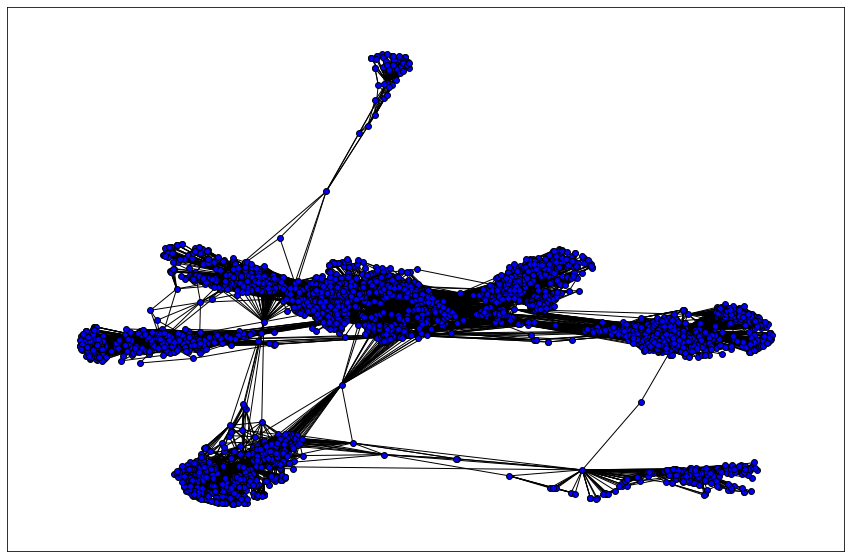

In [27]:
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(G, node_color='blue',with_labels=False, edgecolors='black', node_size=35)#Draw the graph G 

# Centrality measures

In [5]:
deg_centrality = nx.degree_centrality(G) #Compute the degree centrality for nodes of the graph G

In [6]:
close_centrality = nx.closeness_centrality(G) #Compute the closeness centrality for nodes of the graph G

In [7]:
#Compute the betweenness centrality for nodes of the graph G
bet_centrality = nx.betweenness_centrality(G, normalized = True, endpoints = False)

In [8]:
#Compute the eigenvector centrality for nodes of the graph G
eig_centrality=nx.eigenvector_centrality(G)

In [9]:
table = pd.DataFrame()#create dataframe
for noued in G:
    #add the name of each node with its measures centrality
    table = table.append({'Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
                        'CC':close_centrality[noued], 'EC':eig_centrality[noued]},ignore_index=True)
table.to_csv("Data/nodesByCentralityMeasures.csv",index=False)#save our dataframe in file csv 
table

,Node,DC,BC,CC,EC
0,0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,4,0.002476,1.840332e-07,0.261258,2.236416e-07
...,...,...,...,...,...
4034,4034,0.000495,0.000000e+00,0.183989,2.951270e-10
4035,4035,0.000248,0.000000e+00,0.183980,2.912901e-10
4036,4036,0.000495,0.000000e+00,0.183989,2.931223e-10
4037,4037,0.000991,7.156847e-08,0.184005,2.989233e-10


# TOPSIS

## Normalization

In [10]:
def Normalize(table,weights):
    Sum_DC_pow=(table['DC']**2).sum()#
    Sum_BC_pow=(pow(table['BC'],2)).sum()
    Sum_CC_pow=(table['CC']**2).sum()
    Sum_EC_pow=(table['EC']**2).sum()
    result=table.copy()
    result['DC']=(result['DC']/math.sqrt(Sum_DC_pow))*weights[0]
    result['BC']=(result['BC']/math.sqrt(Sum_BC_pow))*weights[1]
    result['CC']=(result['CC']/math.sqrt(Sum_CC_pow))*weights[2]
    result['EC']=(result['EC']/math.sqrt(Sum_EC_pow))*weights[3]
    return result
tableNorm = Normalize(table,[0.2,0.3,0.3,0.2])

In [11]:
tableNorm

,Node,DC,BC,CC,EC
0,0,0.016003,5.921058e-02,0.005989,6.783592e-06
1,1,0.000784,1.126402e-06,0.004430,1.209069e-07
2,2,0.000461,3.073735e-08,0.004428,4.466922e-08
3,3,0.000784,6.819527e-07,0.004430,1.327130e-07
4,4,0.000461,7.447896e-08,0.004428,4.472831e-08
...,...,...,...,...,...
4034,4034,0.000092,0.000000e+00,0.003118,5.902541e-11
4035,4035,0.000046,0.000000e+00,0.003118,5.825803e-11
4036,4036,0.000092,0.000000e+00,0.003118,5.862447e-11
4037,4037,0.000184,2.896404e-08,0.003119,5.978465e-11


In [12]:
def  calculate_relative_closeness(table):
    solutions=pd.DataFrame()
    
    #Positive ideal solution
    max_BC=table['BC'].max()
    max_CC=table['CC'].max()
    max_DC=table['DC'].max()
    max_EC=table['EC'].max()
    
    #Negative ideal solution
    min_BC=table['BC'].min()
    min_CC=table['CC'].min()
    min_DC=table['DC'].min()
    min_EC=table['EC'].min()
     
    for i in range(len(table)):
        #Calculating separation 
        S_positive=math.sqrt(pow(max_DC-table['DC'][i],2) + pow(max_BC-table['BC'][i],2) 
                             + pow(max_CC-table['CC'][i],2) + pow(max_EC-table['EC'][i],2))
        
        S_negative=math.sqrt(pow(min_DC-table['DC'][i],2) + pow(min_BC-table['BC'][i],2) 
                             + pow(min_CC-table['CC'][i],2) + pow(min_EC-table['EC'][i],2))
        #Calculate the relative closeness to the ideal solution
        C = S_negative/(S_negative+S_positive)
        
        solutions = solutions.append({'Node':table['Node'][i],
                                      'S+':S_positive,'S-':S_negative,'Topsis':C},ignore_index=True)
    return solutions

result = calculate_relative_closeness(tableNorm)

In [29]:
res = result[['Node','Topsis']]
res.to_csv("Data/nodesByTopsis.csv",index=False) 

In [14]:
#we sort the nodes by their relative closeness and we put the top 10 in variable "top10Topsis"
top10Topsis = result[['Node','Topsis']].sort_values('Topsis',ascending=False).head(10)
#we maintain the top 10 in the file "top10NodesTopsis.csv" 
top10Topsis.to_csv("Data/top10NodesTopsis.csv",index=False) 
top10Topsis

,Node,Topsis
107,107,0.913277
351,1684,0.695566
352,1912,0.496063
1821,3437,0.488865
0,0,0.304321
571,1085,0.297379
1843,698,0.231106
1710,567,0.193646
58,58,0.169464
350,428,0.132923


In [24]:
rankedNodes = pd.concat([table, result[['Node','Topsis']]], axis = 1).sort_values('Topsis',ascending=False)
rankedNodes.to_csv("Data/rankedNodes.csv",index=False) 
rankedNodes

,Node,DC,BC,CC,EC,Node,Topsis
107,107,0.258791,0.480518,0.459699,2.606940e-04,107,0.913277
351,1684,0.196137,0.337797,0.393606,7.164260e-06,1684,0.695566
352,1912,0.186974,0.229295,0.350947,9.540696e-02,1912,0.496063
1821,3437,0.135463,0.236115,0.314413,9.531613e-08,3437,0.488865
0,0,0.085934,0.146306,0.353343,3.391796e-05,0,0.304321
...,...,...,...,...,...,...,...
1894,749,0.000495,0.000000,0.178262,6.433195e-14,749,0.000229
1986,841,0.000495,0.000000,0.178262,6.446055e-14,841,0.000229
1920,775,0.000495,0.000000,0.178262,6.433195e-14,775,0.000229
1837,692,0.000248,0.000000,0.178255,6.385265e-14,692,0.000000
